In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models, Input, Model

In [3]:
# Load dataset
df = pd.read_csv('D:/Mini Project/new project/archive/data.csv')

# Drop unnecessary columns
df = df.drop(['Unnamed: 32', 'id'], axis=1)

# Separate features and labels
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Encode target variable: Malignant = 1, Benign = 0
y = y.map({'M': 1, 'B': 0})

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for CNN (for 1D Conv)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [5]:
# Define the hybrid model that combines LeNet-5 and CNN
input_layer = Input(shape=(30, 1))

# LeNet-5-like architecture
x = layers.Conv1D(6, 3, activation='relu')(input_layer)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(16, 3, activation='relu')(x)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Flatten()(x)

# CNN layers for additional feature extraction
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(84, activation='relu')(x)

# Output layer
output_layer = layers.Dense(1, activation='sigmoid')(x)

# Define the hybrid model
hybrid_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train the hybrid model
history = hybrid_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9889 - loss: 0.0240 - val_accuracy: 0.9737 - val_loss: 0.0774
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9934 - loss: 0.0185 - val_accuracy: 0.9737 - val_loss: 0.0787
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9954 - loss: 0.0110 - val_accuracy: 0.9737 - val_loss: 0.0814
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9953 - loss: 0.0135 - val_accuracy: 0.9737 - val_loss: 0.0848
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9968 - loss: 0.0071 - val_accuracy: 0.9825 - val_loss: 0.0839
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9997 - loss: 0.0117 - val_accuracy: 0.9561 - val_loss: 0.0936
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9901 - loss: 0.0193 - val_accuracy: 0.9649 - val_loss: 0.1020
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9992 - loss: 0.0088 - val_accuracy: 0.9737 - val_los

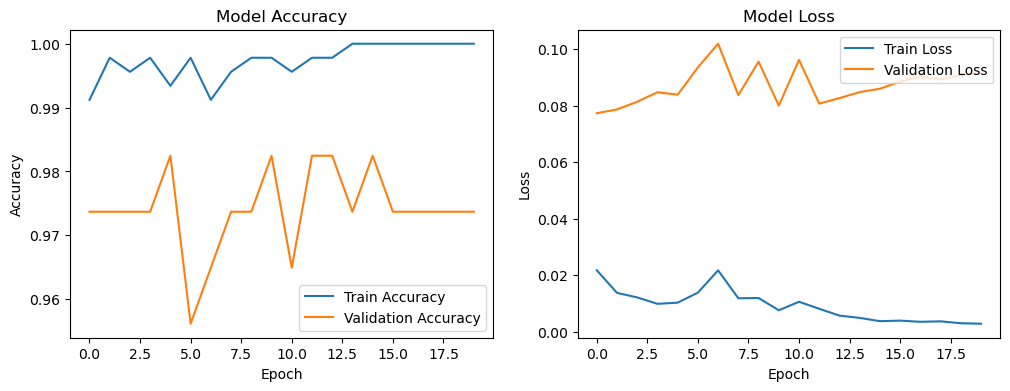

In [13]:
# Plot accuracy and loss
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
# Loss
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


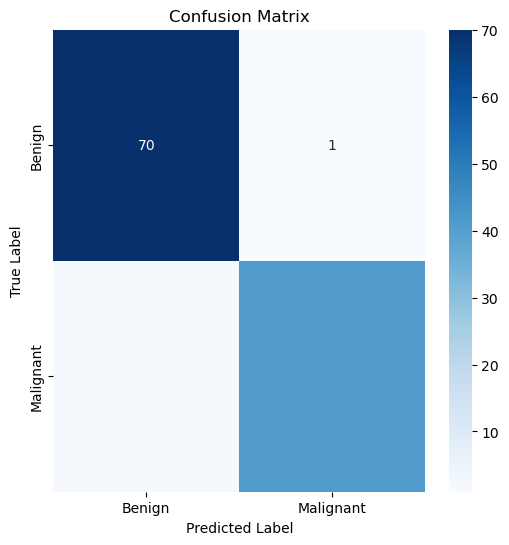

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [15]:
# Predictions on the test set
y_pred = (hybrid_model.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


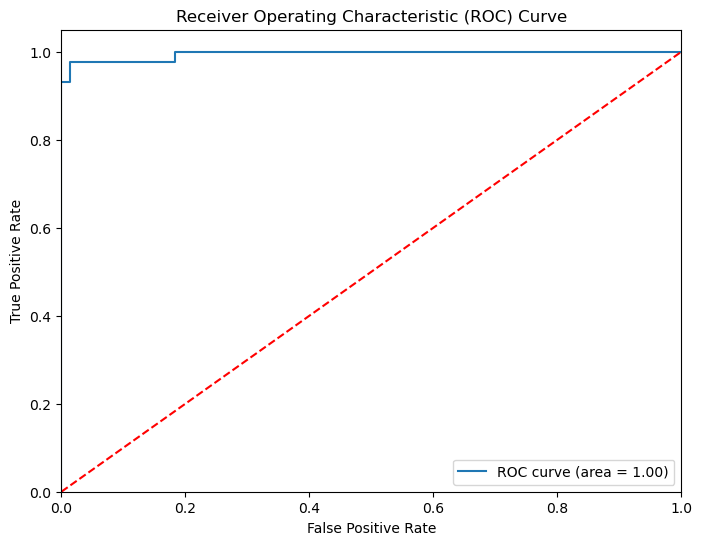

AUC Score: 1.00


In [17]:
# ROC curve and AUC score
y_pred_prob = hybrid_model.predict(X_test)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

In [21]:
# Function for making predictions
def predict_breast_cancer(sample):
    # Ensure the input sample is in DataFrame format with column names
    sample_df = pd.DataFrame([sample], columns=X.columns)  # Recreate a DataFrame using the feature names
    
    # Scale the input sample using the fitted scaler
    sample_scaled = scaler.transform(sample_df)
    sample_scaled = sample_scaled.reshape(1, 30, 1)  # Reshape to match model input (1 sample, 30 features, 1 channel)
    
    # Prediction
    prediction = hybrid_model.predict(sample_scaled)
    
    if prediction > 0.5:
        return "Malignant"
    else:
        return "Benign"

In [23]:
# Example usage: Provide a sample from the test set for prediction
sample = X_test[0].reshape(30)  # Get a sample from the test set
print("Prediction for the sample: ", predict_breast_cancer(sample))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction for the sample:  Malignant
